In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks/인사교_머신러닝/DL (딥러닝)

/content/drive/MyDrive/Colab Notebooks/인사교_머신러닝/DL (딥러닝)


In [7]:
!pwd

/content/drive/MyDrive/Colab Notebooks/인사교_머신러닝/DL (딥러닝)


In [8]:
# 데이터 경로 지정
train_dir = "./data/dogs_vs_cats_small/train"
val_dir = "./data/dogs_vs_cats_small/validation"
test_dir = "./data/dogs_vs_cats_small/test"

In [9]:
# 이미지 정규화(0~255 -> 0~1), 라벨링, 입력값 크기도 동일하게 맞추어야 함(150, 150)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# 픽셀값의 범위 조정하는 기능 생성
generator = ImageDataGenerator(rescale = 1./255) # -> 0~1 사이의 값으로 스케일링

In [29]:
train_generator = generator.flow_from_directory( # 지정된 디렉토리에서 이미지를 불러오고, 배치 단위로 데이터를 생성
    directory = train_dir, # 경로 지정
    target_size = (150, 150), # 이미지들의 크기 조정
    class_mode = "binary", # 이진분류 // categorical(다중분류)
    batch_size = 50 # 배치 단위 지정(한번에 변환할 이미지 개수)
)

val_generator = generator.flow_from_directory( # 지정된 디렉토리에서 이미지를 불러오고, 배치 단위로 데이터를 생성
    directory = val_dir, # 경로 지정
    target_size = (150, 150), # 이미지들의 크기 조정
    class_mode = "binary", # 이진분류 // categorical(다중분류)
    batch_size = 50 # 배치 단위 지정(한번에 변환할 이미지 개수)
)

test_generator = generator.flow_from_directory( # 지정된 디렉토리에서 이미지를 불러오고, 배치 단위로 데이터를 생성
    directory = test_dir, # 경로 지정
    target_size = (150, 150), # 이미지들의 크기 조정
    class_mode = "binary", # 이진분류 // categorical(다중분류)
    batch_size = 50 # 배치 단위 지정(한번에 변환할 이미지 개수)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [ ]:
train_generator.class_indices # 라벨링 확인
# 디렉토리별로 라벨링을 진행하는데, 기본값이 오름차순

{'cats': 0, 'dogs': 1}

In [ ]:
# CNN 모델 -> 특징추출부 (Conv, Pool) + 분류부(Dense)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D

# Input : InputLayer 보다는 좀 더 상위수준의 API
# Conv2D : 2차원의 컨볼루션 층, MaxPool2D : 2차원 맥스풀링 층

# 뼈대
model = Sequential()

# 입력
model.add(Input(shape = (150, 150, 3))) # 150*150, 3개의 색상 채널

##### 특징 추출부 시작 #####
model.add(Conv2D(
    filters = 32, # 찾을 특징의 개수
    kernel_size = (3, 3), # 커널(필터)의 크기
    padding = 'same', # 이미지 크기를 동일하게 하기 위해서, 가장 자리에 0을 채워둠
    # 이미지 자체가 크거나, 특징이 많을 때 -> valid
    # 이미지 자체가 작거나, 가장자리에 중요한 정보가 있다고 판단 되는 경우 -> same
    activation = 'relu',
    strides = (2, 2) # 보폭, 양 옆으로 2픽셀 씩 + 위 아래로 2픽셀 씩
))


model.add(MaxPool2D(
    pool_size = (2, 2) # 풀링 윈도우 설정(최대값을 뽑기 위한 영역 크기)
    # 최댓값 -> 가장 도드라지는 픽셀 1개, 크기는 보통 2*2
))

model.add(Conv2D(
    filters = 16, # 정답은 없음!
    kernel_size = (3,3),
    padding = "same",
    activation = "relu"
))
model.add(MaxPool2D(
    pool_size = (2,2)
))
##### 특징 추출부 끝 #####
model.add(Flatten()) # 다차원의 층을 1차원으로 변환

##### 분류부 시작 #####
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 32, activation = "relu"))
model.add(Dense(units = 16, activation = "relu"))

# 출력층
model.add(Dense(units = 1, activation = "sigmoid"))

In [ ]:
# 딥러닝 설계 확인
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 75, 75, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 37, 37, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 18, 18, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         331,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 339,985 (1.30 MB)

 Trainable params: 339,985 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 학습 방법 설정
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [ ]:
# 학습
model_history = model.fit(
    train_generator,
    epochs = 20,
    validation_data = val_generator
)

# accuracy: 0.9949 - loss: 0.0188 - val_accuracy: 0.6970 - val_loss: 1.3552 -> 과대적합
# 모델 설계를 최소화 하였기 때문
# 기본적으로는 Conv/Pool set가 4~5 set으로 구성됨, filters도 100개 이상의 옵션으로 구성

# 데이터 수를 증가시킴, 모델 깊이를 증가시킴, 설계를 변경, 데이터 증강(변형)
# 규제, dropout, 조기 학습 중단

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 548s 12s/step - accuracy: 0.5030 - loss: 0.7090 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 292ms/step - accuracy: 0.5729 - loss: 0.6793 - val_accuracy: 0.5670 - val_loss: 0.6523
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 290ms/step - accuracy: 0.6385 - loss: 0.6239 - val_accuracy: 0.7020 - val_loss: 0.5894
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 291ms/step - accuracy: 0.7233 - loss: 0.5503 - val_accuracy: 0.6600 - val_loss: 0.6228
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 280ms/step - accuracy: 0.7768 - loss: 0.4822 - val_accuracy: 0.7210 - val_loss: 0.5774
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 295ms/step - accuracy: 0.8242 - loss: 0.4069 - val_accuracy: 0.7120 - val_loss: 0.5862
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 321ms/step - accuracy: 0.8577 - loss: 0.3518 - val_accuracy: 0.7200 - val_loss: 0.6254
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 339ms/step - accuracy: 0.8819 - loss: 0.2882 - val_accuracy: 0.7100

In [12]:
# 예측해보기
import cv2 # opencv
path = "./data/dogs_vs_cats_small/validation/dogs/dog.1006.jpg"
img = cv2.imread(path, cv2.IMREAD_COLOR) # BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR에서 RGB로 변경
img = img.astype(float) / 255 # 0 ~ 1 사이의 값으로 스케일링
img = cv2.resize(img, (150, 150)) # 크기 변경
img = img.reshape((1, 150, 150, 3)) # 차원 맞춰주기

In [ ]:
model.predict(img) # 0.5보다 큰 경우 1 -> 1이 dogs

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.53080136]], dtype=float32)

### CNN (합성곱 신경망)
- 이미지, 영상에 특화
- 추출 된 특징을 가지고 연산을 수행하기 때문에, 픽셀의 위치가 다르더라도 패턴이 다르다고 인식되지 않음

### 구조
1. 특성 추출부
  - Conv : 커널(필터)을 활용해서 중요한 특성들을 숫자값(Featuremap)으로 정보를 담는 역할
    - Padding : 이미지의 가장자리 부분에 특정 값 (기본값은 0)으로 채우는 작업
    - 축소 샘플링 : 이미지의 크기가 너무 크거나, 정보가 너무 많을 때 가치있는 정보만 다음 단계로 넘겨볼 수 있는 기법
    - Stride : 보폭(커널을 이동시킬 때마다 픽셀 단위로 얼만큼 움직일지 나타내는 값)
  - Pool : 중요한 특성들을 걸러내는 역할 (중요하지 않는 특성들을 제외하는 역할)
    - Max : 주로 많이 사용, 풀링 윈도우 내에서 최대값을 반환
    - Avg : 풀링 윈도우 내에서 평균값을 반환 -> 가장 도드라진 특성값(최대값)이 희석될 가능성이 있음!!!
    
2. 분류부
    - MLP(다층 신경망) 구조

In [ ]:
# CNN 모델 >> 특징추출부(Conv, Pool) + 분류부(Dense)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D, Dropout


# 뼈대
model2 = Sequential()


#입력
model2.add(Input(shape = (150,150, 3)))


#### 특징 추출부 시작 ####
model2.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    padding = 'same',


    activation = 'relu',
    strides = (2,2)
))

# Conv2D 이후 Dropout을 적용... 할 수는 있음 But, 성능이 많이 떨어짐. >> 정보 손실 위험 有

model2.add(MaxPool2D(
    pool_size = (2, 2)
))

## drop out 활용
model2.add(Dropout(0.3))
# 풀링층에서 나온 데이터를 처리할 때 무작위로 30%를 0으로 만든 후, 다음 층으로 넘기겠음.


model2.add(Conv2D(
    filters = 16, # 정답은 없음!
    kernel_size = (3,3),
    padding = "same",
    activation = "relu"
))


model2.add(MaxPool2D(
    pool_size = (2,2)
))

#### 특징 추출부 끝 ####


model2.add(Flatten())

##### 분류부 시작 #####

model2.add(Dense(units = 64, activation="relu"))

## drop out 또 활용
model2.add(Dropout(0.3))

model2.add(Dense(units = 32, activation="relu"))
model2.add(Dense(units = 16, activation="relu"))

# 출력층

model2.add(Dense(units = 1, activation = "sigmoid"))

In [ ]:
# 학습 방법 설정
model2.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [ ]:
# 학습
model2_history = model2.fit(
    train_generator,
    epochs = 20,
    validation_data = val_generator
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 1985s 44s/step - accuracy: 0.5101 - loss: 0.7018 - val_accuracy: 0.5430 - val_loss: 0.6913
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 304ms/step - accuracy: 0.5192 - loss: 0.6899 - val_accuracy: 0.5380 - val_loss: 0.6907
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 311ms/step - accuracy: 0.5316 - loss: 0.6848 - val_accuracy: 0.5790 - val_loss: 0.6804
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 325ms/step - accuracy: 0.5709 - loss: 0.6681 - val_accuracy: 0.6100 - val_loss: 0.6541
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 319ms/step - accuracy: 0.6296 - loss: 0.6449 - val_accuracy: 0.6690 - val_loss: 0.6291
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 312ms/step - accuracy: 0.6547 - loss: 0.6129 - val_accuracy: 0.6450 - val_loss: 0.6280
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 456ms/step - accuracy: 0.6942 - loss: 0.5879 - val_accuracy: 0.6880 - val_loss: 0.5991
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 302ms/step - accuracy: 0.7092 - loss: 0.5476 - val_accuracy: 0.691

In [ ]:
# 첫번째 모델(드롭아웃 적용 시키기 전) : accuracy: 0.9949 - loss: 0.0188 - val_accuracy: 0.6970 - val_loss: 1.3552
# 두번째 모델(드롭아웃 적용 이후) : accuracy: 0.9230 - loss: 0.1868 - val_accuracy: 0.6840 - val_loss: 0.9378
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
plt.plot(model2_history.history["accuracy"], label = "train_acc")
plt.plot(model2_history.history["val_accuracy"], label = "val_acc")
plt.legend()
plt.show()

NameError: name 'model2_history' is not defined

<Figure size 1500x500 with 0 Axes>

#### 데이터 증강
- 드롭아웃만으로는 과대적합을 피하지는 못 했음
- 데이터 증강 : 이미지 변형(회전, 이동, 확대, 축소 등)을 통해 데이터를 변형시키는 방법
  - 학습할 때만 적용 !!
  - 과대적합이 일어나는 원인 중에 하나가 train set이 부족하거나 편향적일 때 발생
  - train set을 다양하게 변형해서, 마치 새로운 train 데이터처럼 사용하는 기법
  - 훈련데이터 수가 늘어난 효과(실제로는 아님)

In [ ]:
# 데이터 증강 기법 적용
aug_generator = ImageDataGenerator(
    rescale = 1. /255, # 0~! 사이의 픽셀값 조정(스케일링)
    rotation_range = 20, # -20~ 20도 사이에서 무작위로 회전
    width_shift_range = 0.1, # 10%, 전체 너비의 10%만큼 좌우로 무작위로 이동
    height_shift_range = 0.1, # 10%, 전체 높이의 10%만큼 상하로 무작위로 이동
    shear_range = 0.1, # 시계반대방향으로 지정된 각도(0,1)만큼 변형
    zoom_range = 0.1, # 0.9 ~ 1.1배 사이로 무작위로 확대하거나 축소
    horizontal_flip = True, #수평방향으로 뒤집을지 여부
    fill_mode = "nearest" # 가까운 값으로 채우겠다 !
)

In [ ]:
train_aug_generator = aug_generator.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 25,
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.


In [ ]:
# CNN 모델 >> 특징추출부(Conv, Pool) + 분류부(Dense)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D, Dropout


# 뼈대
model3 = Sequential()


#입력
model3.add(Input(shape = (150,150, 3)))


#### 특징 추출부 시작 ####
model3.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    padding = 'same',


    activation = 'relu',
    strides = (2,2)
))

# Conv2D 이후 Dropout을 적용... 할 수는 있음 But, 성능이 많이 떨어짐. >> 정보 손실 위험 有

model3.add(MaxPool2D(
    pool_size = (2, 2)
))

## drop out 활용
model3.add(Dropout(0.3))
# 풀링층에서 나온 데이터를 처리할 때 무작위로 30%를 0으로 만든 후, 다음 층으로 넘기겠음.


model3.add(Conv2D(
    filters = 16, # 정답은 없음!
    kernel_size = (3,3),
    padding = "same",
    activation = "relu"
))


model3.add(MaxPool2D(
    pool_size = (2,2)
))

#### 특징 추출부 끝 ####


model3.add(Flatten())

##### 분류부 시작 #####

model3.add(Dense(units = 64, activation="relu"))

## drop out 또 활용
model3.add(Dropout(0.3))

model3.add(Dense(units = 32, activation="relu"))
model3.add(Dense(units = 16, activation="relu"))

# 출력층

model3.add(Dense(units = 1, activation = "sigmoid"))

In [ ]:
# 학습 방법 설정
model3.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [ ]:
# 학습
model_history2 = model3.fit(
    train_aug_generator, # 증강 제너레이터 적용!
    epochs = 40, # 증강( 변형) 이라서 더 많은 이미지들을 보여주기 위해 에포크 증가
    validation_data = val_generator
)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 28s 285ms/step - accuracy: 0.5051 - loss: 0.6990 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 26s 304ms/step - accuracy: 0.5136 - loss: 0.6934 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 3/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 38s 270ms/step - accuracy: 0.4881 - loss: 0.6934 - val_accuracy: 0.5140 - val_loss: 0.6922
Epoch 4/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 274ms/step - accuracy: 0.5367 - loss: 0.6921 - val_accuracy: 0.5010 - val_loss: 0.6895
Epoch 5/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 275ms/step - accuracy: 0.5254 - loss: 0.6930 - val_accuracy: 0.5090 - val_loss: 0.7216
Epoch 6/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 265ms/step - accuracy: 0.5437 - loss: 0.6960 - val_accuracy: 0.5780 - val_loss: 0.6857
Epoch 7/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 277ms/step - accuracy: 0.5520 - loss: 0.6835 - val_accuracy: 0.5260 - val_loss: 0.6896
Epoch 8/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 274ms/step - accuracy: 0.5425 - loss: 0.6851 - val_accuracy: 0.598

In [ ]:
# 첫번째 모델(드롭아웃 적용 시키기 전) : accuracy: 0.9949 - loss: 0.0188 - val_accuracy: 0.6970 - val_loss: 1.3552
# 두번째 모델(드롭아웃 적용 이후) : accuracy: 0.9230 - loss: 0.1868 - val_accuracy: 0.6840 - val_loss: 0.9378
# 세번째 모델(드롭아웃 + 데이터증강) : accuracy: 0.7553 - loss: 0.5091 - val_accuracy: 0.7450 - val_loss: 0.5082
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
plt.plot(model_history2.history["accuracy"], label = "train_acc")
plt.plot(model_history2.history["val_accuracy"], label = "val_acc")
plt.legend()
plt.show()

NameError: name 'model_history2' is not defined

<Figure size 1500x500 with 0 Axes>

#### 배치 정규화 (BatchNormalization)
- Conv 층에서 파라미터 값(커널의 요소)들이 너무 큰 숫자값이라면, 학습에 있어서 의존성이 높아지기 때문에 성능이 저하되는 현상이 있을 수 있음
  - 정규화(평균이 0이고, 분산이 1이 되도록)를 수행
  - 일반적으로 숫자 값의 범위들이 작아지면 학습이 안정되고, 속도도 빠름!
  - relu를 사용할 경우 음수가 발생 → 음수의ㅏ 경우 다음 층으로 정보가 전달 되지 않음 → leaky relu 활용
---
- 확실하게 성능 향상됨!
- 되게 좋은데, "왜" 좋아지는지는 수학적으로 규명이 안 됨!

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2 # 규제

# 뼈대
model4 = Sequential()


#입력
model4.add(Input(shape = (150,150, 3)))


#### 특징 추출부 시작 ####
model4.add(Conv2D(
    filters = 32, # 찾을 특징의 개수
    kernel_size = (3,3), # 커널(필터)의 크기
    padding = 'same', # 이미지 크기를 동일하게 하기 위해서, 가장 자리에 0을 채워둠
    strides = (2,2) # 보폭, 양 옆으로 2픽셀씩 + 위 아래로 2픽셀씩
))

# conv -> batch -> activation -> pool (정석적인 순서)
model4.add(BatchNormalization()) # 배치정규화, conv와 pool 사이 !!
model4.add(LeakyReLU(alpha = 0.01)) # 활성화 함수
# alpha = 0.01 : 음수 입력에 대한 기울기를 설정하는 값 -> 음수인 경우 1%의 값만 사용

model4.add(MaxPool2D(
    pool_size = (2, 2) # 풀링 윈도우 설정(최대값을 뽑기 위한 영역 크기)
    # 최댓값 -> 가장 도드라지는 픽셀 1개, 크기는 보통 2*2
))

## drop out 활용
model4.add(Dropout(0.3))
# 풀링층에서 나온 데이터를 처리할 때 무작위로 30%를 0으로 만든 후, 다음 층으로 넘기겠음.


model4.add(Conv2D(
    filters = 16, # 정답은 없음!
    kernel_size = (3,3),
    padding = "same",
    activation = "relu"
))

model4.add(BatchNormalization()) # 배치정규화, conv와 pool 사이 !!
model4.add(LeakyReLU(alpha = 0.01)) # 활성화 함수
model4.add(MaxPool2D(
    pool_size = (2,2)
))

#### 특징 추출부 끝 ####


model4.add(Flatten())

##### 분류부 시작 #####

model4.add(Dense(units = 64, kernel_regularizer = l2(0.01))) # 규제도 적용! (값이 높으면 높을수록, 가하는 규제 강도가 쎄지게 됨!!)
# Dense 층에도 추가 가능 ! -> 더 빠른 연산속도를 위함
model4.add(BatchNormalization()) # 배치정규화, conv와 pool 사이 !!
model4.add(LeakyReLU(alpha = 0.01)) # 활성화 함수

## drop out 또 활용
model4.add(Dropout(0.3))
model4.add(Dense(units = 32, activation="relu"))
model4.add(BatchNormalization()) # 배치정규화, conv와 pool 사이 !!
model4.add(LeakyReLU(alpha = 0.01)) # 활성화 함수

model4.add(Dense(units = 16, activation="relu"))

# 출력층

model4.add(Dense(units = 1, activation = "sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
from tensorflow.keras.optimizers import Adam

# 학습 방법 설정
model4.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(learning_rate = 0.002),
    # 학습률을 더 크게 조정 -> 배치정규화 수행 시 학습률을 좀 더 높게 설정하면 효율적으로 학습을 수행할 수 있음
    metrics = ["accuracy"]
)

In [ ]:
# 학습
model_history3 = model4.fit(
    train_aug_generator, # 증강 제너레이터 적용!
    epochs = 40, # 증강( 변형) 이라서 더 많은 이미지들을 보여주기 위해 에포크 증가
    validation_data = val_generator
)

Epoch 1/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 32s 287ms/step - accuracy: 0.5357 - loss: 1.2742 - val_accuracy: 0.5000 - val_loss: 1.1189
Epoch 2/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 268ms/step - accuracy: 0.5911 - loss: 0.9652 - val_accuracy: 0.5000 - val_loss: 1.1527
Epoch 3/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 283ms/step - accuracy: 0.6027 - loss: 0.9221 - val_accuracy: 0.5180 - val_loss: 0.9409
Epoch 4/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 275ms/step - accuracy: 0.6283 - loss: 0.8968 - val_accuracy: 0.6030 - val_loss: 0.9565
Epoch 5/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 265ms/step - accuracy: 0.6106 - loss: 0.9158 - val_accuracy: 0.5820 - val_loss: 0.9232
Epoch 6/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 285ms/step - accuracy: 0.6363 - loss: 0.9069 - val_accuracy: 0.5720 - val_loss: 0.9492
Epoch 7/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 42s 292ms/step - accuracy: 0.6270 - loss: 0.9081 - val_accuracy: 0.5190 - val_loss: 1.0258
Epoch 8/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 271ms/step - accuracy: 0.6423 - loss: 0.8901 - val_accu

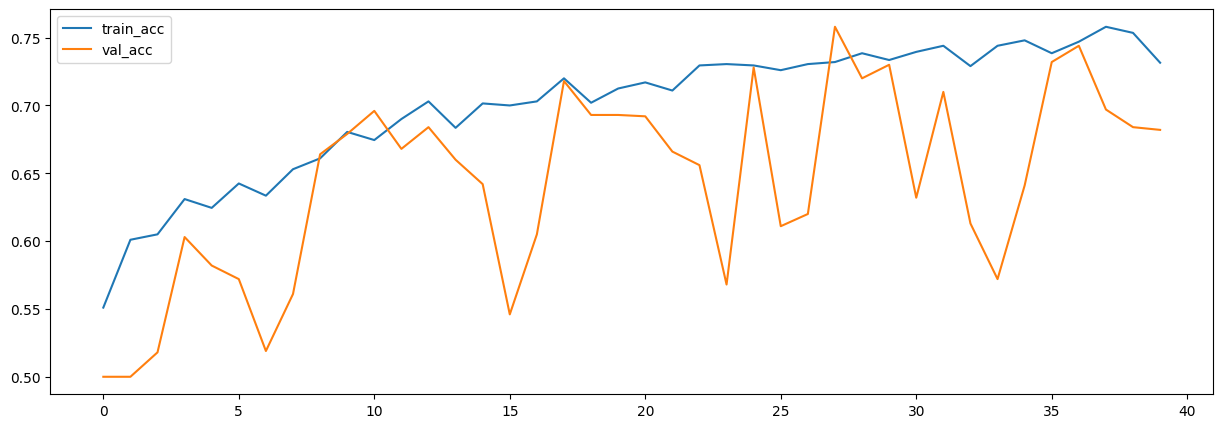

In [ ]:
# 첫번째 모델(드롭아웃 적용 시키기 전) : accuracy: 0.9949 - loss: 0.0188 - val_accuracy: 0.6970 - val_loss: 1.3552
# 두번째 모델(드롭아웃 적용 이후) : accuracy: 0.9230 - loss: 0.1868 - val_accuracy: 0.6840 - val_loss: 0.9378
# 세번째 모델(드롭아웃 + 데이터증강) : accuracy: 0.7553 - loss: 0.5091 - val_accuracy: 0.7450 - val_loss: 0.5082
# 네번째 모델
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
plt.plot(model_history3.history["accuracy"], label = "train_acc")
plt.plot(model_history3.history["val_accuracy"], label = "val_acc")
plt.legend()
plt.show()

```python
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2 # 규제

# 뼈대
model4 = Sequential()

# 입력
model4.add(Input(shape = (150, 150, 3))) # 150*150, 3개의 색상 채널

##### 특징 추출부 시작 #####
model4.add(Conv2D(
    filters = 32, # 찾을 특징의 개수
    kernel_size = (3, 3), # 커널(필터)의 크기
    padding = 'same', # 이미지 크기를 동일하게 하기 위해서, 가장 자리에 0을 채워둠
    strides = (2, 2) # 보폭, 양 옆으로 2픽셀씩 + 위 아래로 2픽셀씩
))
# conv -> batch -> activation -> pool
model4.add(BatchNormalization()) # 배치정규화, conv와 pool 사이!!
model4.add(LeakyReLU(alpha = 0.01)) # 활성화 함수
# alpha = 0.01 : 음수 입력에 대한 기울기를 설정하는 값 -> 음수인 경우 1%의 값만 사용

model4.add(MaxPool2D(
    pool_size = (2, 2) # 풀링 윈도우 설정(최대값을 뽑기 위한 영역 크기)
    # 최댓값 -> 가장 도드라지는 픽셀 1개, 크기는 보통 2*2
))

model4.add(Dropout(0.3)) # Dropout 활용, 30%를 무작위로 0으로 만든 후 다음 층으로 넘기겠다!

model4.add(Conv2D(
    filters = 16, # 정답은 없음!
    kernel_size = (3, 3),
    padding = "same",
    activation = "relu"
))
model4.add(BatchNormalization()) # 배치정규화, conv와 pool 사이!!
model4.add(LeakyReLU(alpha = 0.01)) # 활성화 함수
model4.add(MaxPool2D(
    pool_size = (2,2)
))
##### 특징 추출부 끝 #####

model4.add(Flatten()) # 다차원의 층을 1차원으로 변환

##### 분류부 시작 #####
model4.add(Dense(units = 64, kernel_regularizer = l2(0.01))) # 규제도 적용! (갚이 높으면 높을 수록, 가하는 규제 강도가 쎄지게 됨!!)
# Dense층에도 추가 가능! -> 더 빠른 연산속도를 위함
model4.add(BatchNormalization()) # 배치정규화, conv와 pool 사이!!
model4.add(LeakyReLU(alpha = 0.01)) # 활성화 함수
model4.add(Dropout(0.3)) # Dropout 활용

model4.add(Dense(units = 32, activation = "relu"))
model4.add(BatchNormalization()) # 배치정규화, conv와 pool 사이!!
model4.add(LeakyReLU(alpha = 0.01)) # 활성화 함수

model4.add(Dense(units = 16, activation = "relu"))

# 출력층
model4.add(Dense(units = 1, activation = "sigmoid"))
```

### 전이학습(Transfer learning) : 기존에 잘 만들어진 모델 가져와 학습
- 사전 학습 모델을 가져와서, 새로운 데이터로 일부 계층을 새로 학습하는 방법
- Fine tunning(미세 조정) : 일부 계층(또느 전체 모델)을 추가로 미세하게 학습

In [13]:
from tensorflow.keras.applications import VGG16 # 사전 학습 모델

In [14]:
conv_base = VGG16(
    weights = 'imagenet',  # weights = 가중치 / 'imagenet(수천가지 데이터를 학습시킨 카테고리?)에서 학습되어있는 가중치를 가져오겠다.'
    include_top = False,   # 분류부 사용 여부 >> false = 특징 추출부만 사용하겠다는 의미
    input_shape = (150,150,3) # 이미지 크기 조정 ( 150x150 / 3차원 )
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [15]:
conv_base.summary()

# Param :: 학습해야 할 파라미터값 (조정되어 있음)
# 특징추출부만 가져오겠다 선언했으므로 Dense층은 없음

# Total params: 14,714,688 (56.13 MB)
# Trainable params: 14,714,688 (56.13 MB)
# Non-trainable params: 0 (0.00 B)
# ▲ 제일 중요!!!!
# total params : 총 파라미터
# Trainable params 학습 가능한 파라미터 개수
# Non-trainable params 학습할 때 파라미터가 이루어지지 않는 개수?

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# 전이학습 시 주의점 : 전체 층은 얼려두고 학습 수행해야 함
conv_base.trainable = False  # 전체 층 동결!!

In [17]:
# 사전 학습된 모델을 갖고 설계!

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2 # 규제

# 뼈대
transfer_model = Sequential()

transfer_model.add(conv_base)  # VGG16으로 모델의 특징 추출부로 세팅 (단, 지금은 학습이 수행되지 않게끔 동결해놓은 상태)

transfer_model.add(Flatten())  # Dense 층에 들어가도록 다차원 데이터를 일차원으로 바꿈
transfer_model.add(Dense(64, activation = "relu"))
transfer_model.add(Dense(32, activation = "relu"))
transfer_model.add(Dense(12, activation = "relu"))

transfer_model.add(Dense(1, activation = "sigmoid"))


In [18]:
transfer_model.compile(
    loss = "binary_crossentropy",
    metrics = ["accuracy"],
    optimizer = "adam"
)

In [19]:
# 데이터 증강 기법 적용
aug_generator = ImageDataGenerator(
    rescale = 1. / 255, # 0~1 사이의 픽셀값 조정(스케일링)
    rotation_range = 20, # -20 ~ 20도 사이에서 무작위로 회전
    width_shift_range = 0.1, # 10%, 전체 너비의 10%만큼 좌우로 무작위로 이동
    height_shift_range = 0.1, # 10%, 전체 높이의 10%만큼 상하로 무작위로 이동
    shear_range = 0.1, # 시계반대방향으로 지정된 각도(0.1)만큼 변형
    zoom_range = 0.1, # 0.9 ~ 1.1배 사이로 무작위로 확대하거나 축소
    horizontal_flip = True, # 수평방향으로 뒤집을지 여부
    fill_mode = "nearest" # 가까운 값으로 채우겠다!
)


In [20]:
train_aug_generator = aug_generator.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 25,
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.


In [ ]:
transfer_model_his = transfer_model.fit(
    train_aug_generator,
    epochs = 20,
    validation_data = val_generator)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 675s 8s/step - accuracy: 0.6977 - loss: 0.5555 - val_accuracy: 0.8970 - val_loss: 0.2843
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 320ms/step - accuracy: 0.8429 - loss: 0.3621 - val_accuracy: 0.9010 - val_loss: 0.2498
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 300ms/step - accuracy: 0.8648 - loss: 0.2978 - val_accuracy: 0.8780 - val_loss: 0.2998
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 294ms/step - accuracy: 0.8940 - loss: 0.2681 - val_accuracy: 0.8420 - val_loss: 0.3602
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 26s 305ms/step - accuracy: 0.8900 - loss: 0.2511 - val_accuracy: 0.9110 - val_loss: 0.2302
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 298ms/step - accuracy: 0.9144 - loss: 0.2206 - val_accuracy: 0.9010 - val_loss: 0.2442
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 297ms/step - accuracy: 0.9049 - loss: 0.2334 - val_accuracy: 0.8540 - val_loss: 0.3774
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 300ms/step - accuracy: 0.9015 - loss: 0.2411 - val_accuracy: 0.8980 

### 전이학습, 미세조정
- 미세조정 : 전이학습 후에, 전체 모델 또는 일부 계층을 추가로 학습

1. 사전학습 된 특성추출부 하단에 분류부를 추가
2. 사전학습 된 특성추출부 Freeze (잘 학습 된 파라미터 값들이 손실되지 않게끔)
3. 새로운 분류부 학습
---
4. 사전 학습 된 특성 추출부 중 학습시킬 일부 계층의 Freeze 풀기
5. 고정을 푼 상태에서 **작은 학습률**로 Training


In [21]:
# 각 층의 이름 접근
conv_base.layers[10].name

'block3_pool'

In [22]:
# 전체 동결 해제 -> 전체 동결되어 있는 경우, 개별 요소 동결이 수행되지 않음 !!
conv_base.trainable = True

In [23]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# 미세조정 방식
for layer in conv_base.layers :
  if layer.name == "block5_conv3":
    layer.trainable = True
  else :
    layer.trainable = False

In [25]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 2,359,808 (9.00 MB)

 Non-trainable params: 12,354,880 (47.13 MB)

In [26]:
transfer_model2 = Sequential()

transfer_model2.add(conv_base) # 마지막 층의 동결이 해제된 상황

transfer_model2.add(Flatten())
transfer_model2.add(Dense(64, activation = "relu"))
transfer_model2.add(Dense(32, activation = "relu"))
transfer_model2.add(Dense(16, activation = "relu"))

transfer_model2.add(Dense(1, activation = "sigmoid"))

In [27]:
from keras.optimizers import Adam

transfer_model2.compile(
    loss = "binary_crossentropy",
    metrics = ["accuracy"],
    optimizer = Adam(learning_rate = 0.0001) # 기본값 : 0.0001 -> 10배 가량의 학습률로 조정
)

In [ ]:
transfer_model2.fit(train_aug_generator, epochs = 20, validation_data = val_generator)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 1373s 16s/step - accuracy: 0.6698 - loss: 0.5675 - val_accuracy: 0.8840 - val_loss: 0.2546
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 826s 10s/step - accuracy: 0.8888 - loss: 0.2608 - val_accuracy: 0.9070 - val_loss: 0.2237
Epoch 3/20
29/80 ━━━━━━━━━━━━━━━━━━━━ 5:36 7s/step - accuracy: 0.9116 - loss: 0.1894

KeyboardInterrupt: 